## Exploring the Relationship Between Teacher Salaries, National Average Salaries, and Student Outcomes (PISA Scores) in 2022

### Objective:

- Investigate how teacher salaries correlate with student performance (PISA scores).
- Compare teacher salaries to average national salaries.
- Analyse disparities in student outcomes between disadvantaged and advantaged students.
- Identify potential trends across different education levels.

### Research Questions:

- Does higher teacher pay correlate with better student outcomes?
- How do teacher salaries compare to national average salaries?
- Do teacher salaries impact educational equity (performance gaps between disadvantaged and advantaged students)?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.graph_objs as go
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
import sys
sys.path.insert(0, '/Users/beejalparekh/Desktop/Bootcamp/_DA_course/_functions_/')
from functions_eda import *

### 1. Load the datasets & check the data

In [3]:
# Import the data
teacher_salaries = pd.read_csv('/Users/beejalparekh/Desktop/Bootcamp/_DA_course/_DA-project_/Datasets/World Populations Review/teacher-salary-by-country-2022.csv')
average_salaries = pd.read_csv('/Users/beejalparekh/Desktop/Bootcamp/_DA_course/_DA-project_/Datasets/UNECE/AVG monthly wages.csv')
pisa_scores = pd.ExcelFile('/Users/beejalparekh/Desktop/Bootcamp/_DA_course/_DA-project_/Datasets/OECD PISA/PISA mean scores 2022.xlsx')

# Raw copies
raw_teacher_salaries = teacher_salaries.copy()
raw_average_salaries = average_salaries.copy()

In [4]:
teacher_salaries.head()

,flagCode,country,TeacherSalary_PrimarySchoolTeacherStarting_USD_2022,TeacherSalary_PrimarySchoolTeacherTopOfScale_USD_2022,TeacherSalary_LowerSecondarySchoolTeacherStarting_USD_2022,TeacherSalary_LowerSecondarySchoolTeacherTopOfScale_USD_2022,TeacherSalary_UpperSecondarySchoolTeacherStarting_USD_2022,TeacherSalary_UpperSecondarySchoolTeacherTopOfScale_USD_2022
0,LU,Luxembourg,71647,126576.0,81200,141144.0,81200,141144.0
1,DE,Germany,70419,91713.0,77905,101510.0,81141,110694.0
2,DK,Denmark,53364,61473.0,53598,61968.0,50444,65555.0
3,AT,Austria,49646,86526.0,49646,92041.0,49646,102120.0
4,NL,Netherlands,48805,99715.0,48662,99717.0,48662,99717.0


In [5]:
average_salaries.head()

,Indicator,Country,2018,2019,2020,2021,2022
0,"US$, at current Exchange Rates",Albania,468.5,476.8,493.9,552.5,547.6
1,"US$, at current Exchange Rates",Andorra,..,..,..,..,..
2,"US$, at current Exchange Rates",Armenia,357.6,380.2,388.0,405.0,540.7
3,"US$, at current Exchange Rates",Austria,4287.6,4171.7,4310.9,4639.7,4326.3
4,"US$, at current Exchange Rates",Azerbaijan,320.4,373.6,416.3,430.6,494.1


In [6]:
# Extract tabs from PISA excel
file_path = '/Users/beejalparekh/Desktop/Bootcamp/_DA_course/_DA-project_/Datasets/OECD PISA/PISA mean scores 2022.xlsx'
# Table I.1 Snapshot of performance in mathematics, reading and science
pisa_mean_scores = pd.read_excel(file_path, sheet_name=1)
# Table I.2 Snapshot of socio-economic disparities in academic performance
pisa_socio_economic = pd.read_excel(file_path, sheet_name=2)
# Table I.3 Snapshot of gender gaps in performance
pisa_gender = pd.read_excel(file_path, sheet_name=3)
# Table I.4 Snapshot of immigrant students
pisa_immigrants = pd.read_excel(file_path, sheet_name=4)

Clean up pisa mean scores dataframe - get rid of empty rows and columns

In [7]:
# Set row 14 (index 13) as the header
pisa_mean_scores.columns = pisa_mean_scores.iloc[13]  # Assign row 14 as column headers
pisa_mean_scores = pisa_mean_scores[14:].reset_index(drop=True)  # Remove the old header row

In [8]:
pisa_mean_scores = pisa_mean_scores.iloc[:, :4]

In [9]:
#Set row 1 as header
pisa_mean_scores.columns = pisa_mean_scores.iloc[0]  # Assign row 14 as column headers
pisa_mean_scores = pisa_mean_scores[2:].reset_index(drop=True)  # Remove the old header row and row 1

In [10]:
pisa_mean_scores.columns = pisa_mean_scores.columns.fillna('Country')
pisa_mean_scores = pisa_mean_scores.iloc[1:].reset_index(drop=True)

In [11]:
pisa_mean_scores.head()

,Country,Mathematics,Reading,Science
0,Singapore,574.66382,542.553322,561.433275
1,Japan,535.579306,515.854614,546.634454
2,Korea,527.302502,515.415392,527.822418
3,Estonia,509.946953,511.030332,525.811778
4,Switzerland,507.990586,483.331734,502.523242


Clean up pisa socio economic data - get rid of empty rows and columns

In [12]:
# Set row 14 (index 13) as the header
pisa_socio_economic.columns = pisa_socio_economic.iloc[13]  # Assign row 14 as column headers
pisa_socio_economic = pisa_socio_economic[17:].reset_index(drop=True)  # Remove the old header row

In [13]:
pisa_socio_economic = pisa_socio_economic.iloc[:, :5]

In [14]:
pisa_socio_economic.columns = ['Country', 
              'Coverage Index 3:Coverage of 15-year-old population', 
              'Strength: Percentage of variance in mathematics performance explained by ESCS1', 
             'Percentage of disadvantaged students who are academically resilient',
             'Difference between advantaged and disadvantaged students in mathematics',
             ]

In [15]:
pisa_socio_economic.head()

,Country,Coverage Index 3:Coverage of 15-year-old population,Strength: Percentage of variance in mathematics performance explained by ESCS1,Percentage of disadvantaged students who are academically resilient,Difference between advantaged and disadvantaged students in mathematics
0,Cambodia,0.362739,1.924552,18.217807,20.974256
1,Uzbekistan,0.880582,2.009522,19.554093,22.379562
2,Kazakhstan,0.934065,3.939801,16.829596,41.348884
3,Albania,0.79201,4.480923,17.126901,48.755692
4,Philippines,0.832959,4.774886,11.599883,36.400151


#### 1.1 Check the structure of the dataframes

In [16]:
print(teacher_salaries.shape)
print(average_salaries.shape)
print(pisa_mean_scores.shape)
print(pisa_socio_economic.shape)

(34, 8)
(56, 7)
(91, 4)
(94, 5)


In [17]:
teacher_salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 8 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   flagCode                                                      34 non-null     object 
 1   country                                                       34 non-null     object 
 2   TeacherSalary_PrimarySchoolTeacherStarting_USD_2022           34 non-null     int64  
 3   TeacherSalary_PrimarySchoolTeacherTopOfScale_USD_2022         31 non-null     float64
 4   TeacherSalary_LowerSecondarySchoolTeacherStarting_USD_2022    34 non-null     int64  
 5   TeacherSalary_LowerSecondarySchoolTeacherTopOfScale_USD_2022  31 non-null     float64
 6   TeacherSalary_UpperSecondarySchoolTeacherStarting_USD_2022    34 non-null     int64  
 7   TeacherSalary_UpperSecondarySchoolTeacherTopOfScale_USD_2022  31 non-null 

In [18]:
average_salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Indicator  56 non-null     object
 1   Country    56 non-null     object
 2   2018       56 non-null     object
 3   2019       56 non-null     object
 4   2020       56 non-null     object
 5   2021       56 non-null     object
 6   2022       56 non-null     object
dtypes: object(7)
memory usage: 3.2+ KB


In [19]:
pisa_mean_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Country      89 non-null     object
 1   Mathematics  81 non-null     object
 2   Reading      81 non-null     object
 3   Science      81 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [20]:
pisa_socio_economic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 5 columns):
 #   Column                                                                          Non-Null Count  Dtype 
---  ------                                                                          --------------  ----- 
 0   Country                                                                         92 non-null     object
 1   Coverage Index 3:Coverage of 15-year-old population                             81 non-null     object
 2   Strength: Percentage of variance in mathematics performance explained by ESCS1  81 non-null     object
 3   Percentage of disadvantaged students who are academically resilient             81 non-null     object
 4   Difference between advantaged and disadvantaged students in mathematics         81 non-null     object
dtypes: object(5)
memory usage: 3.8+ KB


### 2. Data cleaning

#### 2.1 Convert data types if needed

In [21]:
# Convert salary year columns to float
cols = ['2018', '2019', '2020', '2021', '2022']
average_salaries[cols] = average_salaries[cols].apply(pd.to_numeric, errors="coerce")
average_salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Indicator  56 non-null     object 
 1   Country    56 non-null     object 
 2   2018       50 non-null     float64
 3   2019       49 non-null     float64
 4   2020       50 non-null     float64
 5   2021       50 non-null     float64
 6   2022       50 non-null     float64
dtypes: float64(5), object(2)
memory usage: 3.2+ KB


In [22]:
# Convert mean scores columns to numeric
cols = ['Coverage Index 3:Coverage of 15-year-old population', 
        'Strength: Percentage of variance in mathematics performance explained by ESCS1', 
        'Percentage of disadvantaged students who are academically resilient',
       'Difference between advantaged and disadvantaged students in mathematics'
       ]
pisa_socio_economic[cols] = pisa_socio_economic[cols].apply(pd.to_numeric, errors="coerce")
pisa_socio_economic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 5 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   Country                                                                         92 non-null     object 
 1   Coverage Index 3:Coverage of 15-year-old population                             81 non-null     float64
 2   Strength: Percentage of variance in mathematics performance explained by ESCS1  80 non-null     float64
 3   Percentage of disadvantaged students who are academically resilient             80 non-null     float64
 4   Difference between advantaged and disadvantaged students in mathematics         80 non-null     float64
dtypes: float64(4), object(1)
memory usage: 3.8+ KB


In [23]:
# Convert socio-economic scores columns to numeric
cols = ['Mathematics', 'Reading', 'Science']
pisa_mean_scores[cols] = pisa_mean_scores[cols].apply(pd.to_numeric, errors="coerce")
pisa_mean_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      89 non-null     object 
 1   Mathematics  81 non-null     float64
 2   Reading      81 non-null     float64
 3   Science      81 non-null     float64
dtypes: float64(3), object(1)
memory usage: 3.0+ KB


#### 2.2 Handle missing values (drop, impute, or fill)

In [24]:
# Identify missing values - teacher salaries
teacher_salaries.isnull().sum()

flagCode                                                        0
country                                                         0
TeacherSalary_PrimarySchoolTeacherStarting_USD_2022             0
TeacherSalary_PrimarySchoolTeacherTopOfScale_USD_2022           3
TeacherSalary_LowerSecondarySchoolTeacherStarting_USD_2022      0
TeacherSalary_LowerSecondarySchoolTeacherTopOfScale_USD_2022    3
TeacherSalary_UpperSecondarySchoolTeacherStarting_USD_2022      0
TeacherSalary_UpperSecondarySchoolTeacherTopOfScale_USD_2022    3
dtype: int64

In [25]:
teacher_salaries[teacher_salaries['TeacherSalary_PrimarySchoolTeacherTopOfScale_USD_2022'].isnull()]

,flagCode,country,TeacherSalary_PrimarySchoolTeacherStarting_USD_2022,TeacherSalary_PrimarySchoolTeacherTopOfScale_USD_2022,TeacherSalary_LowerSecondarySchoolTeacherStarting_USD_2022,TeacherSalary_LowerSecondarySchoolTeacherTopOfScale_USD_2022,TeacherSalary_UpperSecondarySchoolTeacherStarting_USD_2022,TeacherSalary_UpperSecondarySchoolTeacherTopOfScale_USD_2022
22,EE,Estonia,26031,NaN,26031,NaN,26031,NaN
29,BR,Brazil,20261,NaN,20261,NaN,20261,NaN
31,LV,Latvia,17039,NaN,17039,NaN,17039,NaN


In [26]:
# Identify missing values - average salaries
average_salaries.isnull().sum()

Indicator    0
Country      0
2018         6
2019         7
2020         6
2021         6
2022         6
dtype: int64

In [27]:
average_salaries[average_salaries['2022'].isnull()]

,Indicator,Country,2018,2019,2020,2021,2022
1,"US$, at current Exchange Rates",Andorra,NaN,NaN,NaN,NaN,NaN
28,"US$, at current Exchange Rates",Liechtenstein,NaN,NaN,NaN,NaN,NaN
32,"US$, at current Exchange Rates",Monaco,NaN,NaN,NaN,NaN,NaN
41,"US$, at current Exchange Rates",Russian Federation,NaN,NaN,NaN,NaN,NaN
42,"US$, at current Exchange Rates",San Marino,NaN,NaN,NaN,NaN,NaN
51,"US$, at current Exchange Rates",Turkmenistan,NaN,NaN,NaN,NaN,NaN


In [28]:
average_salaries = average_salaries.drop(columns=['2018', '2019','2020','2021'])

In [29]:
# remove countries with no value for 2022 average salaries
average_salaries = average_salaries.dropna(subset=['2022']) 

In [30]:
# Identify missing values - average salaries
pisa_mean_scores.isnull().sum()

0
Country         2
Mathematics    10
Reading        10
Science        10
dtype: int64

In [31]:
pisa_mean_scores[pisa_mean_scores['Country'].isnull()]

,Country,Mathematics,Reading,Science
73,NaN,NaN,NaN,NaN
82,NaN,NaN,NaN,NaN


In [32]:
#remove rows with no values
pisa_mean_scores = pisa_mean_scores.dropna(subset=['Country'])

In [33]:
pisa_mean_scores[pisa_mean_scores['Mathematics'].isnull()]

,Country,Mathematics,Reading,Science
83,* Caution is required when interpreting estima...,NaN,NaN,NaN
84,** Caution is required when comparing estimate...,NaN,NaN,NaN
85,Notes: Values that are statistically significa...,NaN,NaN,NaN
86,Long-term trends are reported for the longest ...,NaN,NaN,NaN
87,The OECD average does not include Costa Rica a...,NaN,NaN,NaN
88,Countries and economies are ranked in descendi...,NaN,NaN,NaN
89,"Source: OECD, PISA 2022 Database, Tables I.B1....",NaN,NaN,NaN
90,Information on data for Cyprus: https://oe.cd/...,NaN,NaN,NaN


In [34]:
#remove rows that are footnotes
pisa_mean_scores = pisa_mean_scores.dropna(subset=['Mathematics'])

In [35]:
pisa_mean_scores.shape

(81, 4)

In [36]:
pisa_socio_economic.isnull().sum()

Country                                                                            2
Coverage Index 3:Coverage of 15-year-old population                               13
Strength: Percentage of variance in mathematics performance explained by ESCS1    14
Percentage of disadvantaged students who are academically resilient               14
Difference between advantaged and disadvantaged students in mathematics           14
dtype: int64

In [37]:
pisa_socio_economic[pisa_socio_economic['Country'].isnull()]

,Country,Coverage Index 3:Coverage of 15-year-old population,Strength: Percentage of variance in mathematics performance explained by ESCS1,Percentage of disadvantaged students who are academically resilient,Difference between advantaged and disadvantaged students in mathematics
73,NaN,NaN,NaN,NaN,NaN
82,NaN,NaN,NaN,NaN,NaN


In [38]:
pisa_socio_economic = pisa_socio_economic.dropna(subset=['Country'])

In [39]:
pisa_socio_economic[pisa_socio_economic['Coverage Index 3:Coverage of 15-year-old population'].isnull()]

,Country,Coverage Index 3:Coverage of 15-year-old population,Strength: Percentage of variance in mathematics performance explained by ESCS1,Percentage of disadvantaged students who are academically resilient,Difference between advantaged and disadvantaged students in mathematics
83,"1. ESCS refers to the PISA index of economic, ...",NaN,NaN,NaN,NaN
84,2. Academically resilient students are disadva...,NaN,NaN,NaN,NaN
85,3. A socio-economically advantaged (disadvanta...,NaN,NaN,NaN,NaN
86,4. A positive (negative) score difference indi...,NaN,NaN,NaN,NaN
87,5. A positive (negative) score difference indi...,NaN,NaN,NaN,NaN
88,* Caution is required when interpreting estima...,NaN,NaN,NaN,NaN
89,Notes: Values that are statistically significa...,NaN,NaN,NaN,NaN
90,The OECD average does not include Costa Rica a...,NaN,NaN,NaN,NaN
91,Countries and economies are ranked in ascendin...,NaN,NaN,NaN,NaN
92,"Source: OECD, PISA 2022 Database, Tables I.B1....",NaN,NaN,NaN,NaN


In [40]:
# remove rows that are footnotes
pisa_socio_economic = pisa_socio_economic.dropna(subset=['Coverage Index 3:Coverage of 15-year-old population'])

In [41]:
pisa_socio_economic[pisa_socio_economic['Strength: Percentage of variance in mathematics performance explained by ESCS1'].isnull()]

,Country,Coverage Index 3:Coverage of 15-year-old population,Strength: Percentage of variance in mathematics performance explained by ESCS1,Percentage of disadvantaged students who are academically resilient,Difference between advantaged and disadvantaged students in mathematics
72,Costa Rica,0.775881,NaN,NaN,NaN


In [42]:
#remove Costa Rica
pisa_socio_economic = pisa_socio_economic.dropna(subset=['Strength: Percentage of variance in mathematics performance explained by ESCS1'])

In [43]:
print(teacher_salaries.isnull().sum())
print()
print(average_salaries.isnull().sum())
print()
print(pisa_mean_scores.isnull().sum())
print()
print(pisa_socio_economic.isnull().sum())

flagCode                                                        0
country                                                         0
TeacherSalary_PrimarySchoolTeacherStarting_USD_2022             0
TeacherSalary_PrimarySchoolTeacherTopOfScale_USD_2022           3
TeacherSalary_LowerSecondarySchoolTeacherStarting_USD_2022      0
TeacherSalary_LowerSecondarySchoolTeacherTopOfScale_USD_2022    3
TeacherSalary_UpperSecondarySchoolTeacherStarting_USD_2022      0
TeacherSalary_UpperSecondarySchoolTeacherTopOfScale_USD_2022    3
dtype: int64

Indicator    0
Country      0
2022         0
dtype: int64

0
Country        0
Mathematics    0
Reading        0
Science        0
dtype: int64

Country                                                                           0
Coverage Index 3:Coverage of 15-year-old population                               0
Strength: Percentage of variance in mathematics performance explained by ESCS1    0
Percentage of disadvantaged students who are academically resil

#### 2.3 Remove duplicates & fix inconsistencies (e.g., incorrect data formats, spelling errors)

In [44]:
teacher_salaries.columns

Index(['flagCode', 'country',
       'TeacherSalary_PrimarySchoolTeacherStarting_USD_2022',
       'TeacherSalary_PrimarySchoolTeacherTopOfScale_USD_2022',
       'TeacherSalary_LowerSecondarySchoolTeacherStarting_USD_2022',
       'TeacherSalary_LowerSecondarySchoolTeacherTopOfScale_USD_2022',
       'TeacherSalary_UpperSecondarySchoolTeacherStarting_USD_2022',
       'TeacherSalary_UpperSecondarySchoolTeacherTopOfScale_USD_2022'],
      dtype='object')

In [45]:
sorted(list(teacher_salaries['country']))

['Australia',
 'Austria',
 'Brazil',
 'Canada',
 'Chile',
 'Costa Rica',
 'Czech Republic',
 'Denmark',
 'Estonia',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Hungary',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Mexico',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Poland',
 'Portugal',
 'Romania',
 'Slovakia',
 'Slovenia',
 'South Korea',
 'Spain',
 'Turkey',
 'United States']

In [46]:
teacher_salaries = teacher_salaries.rename(columns={'country':'Country',
                                                   'TeacherSalary_PrimarySchoolTeacherStarting_USD_2022':'primary_starting',
                                                    'TeacherSalary_PrimarySchoolTeacherTopOfScale_USD_2022':'primary_top',
                                                    'TeacherSalary_LowerSecondarySchoolTeacherStarting_USD_2022':'lower_secondary_starting',
                                                    'TeacherSalary_LowerSecondarySchoolTeacherTopOfScale_USD_2022':'lower_secondary_top',
                                                    'TeacherSalary_UpperSecondarySchoolTeacherStarting_USD_2022':'upper_secondary_starting',
                                                     'TeacherSalary_UpperSecondarySchoolTeacherTopOfScale_USD_2022':'upper_secondary_top'
                                                   })

In [47]:
average_salaries.columns

Index(['Indicator', 'Country', '2022'], dtype='object')

In [48]:
sorted(list(average_salaries['Country']))

['Albania',
 'Armenia',
 'Austria',
 'Azerbaijan',
 'Belarus',
 'Belgium',
 'Bosnia and Herzegovina',
 'Bulgaria',
 'Canada',
 'Croatia',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Estonia',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Greece',
 'Hungary',
 'Iceland',
 'Ireland',
 'Israel',
 'Italy',
 'Kazakhstan',
 'Kyrgyzstan',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Malta',
 'Montenegro',
 'Netherlands',
 'North Macedonia',
 'Norway',
 'Poland',
 'Portugal',
 'Republic of Moldova',
 'Romania',
 'Serbia',
 'Slovakia',
 'Slovenia',
 'Spain',
 'Sweden',
 'Switzerland',
 'Tajikistan',
 'Turkiye',
 'Ukraine',
 'United Kingdom',
 'United States',
 'Uzbekistan']

In [49]:
average_salaries = average_salaries.replace('Turkiye', 'Turkey')
average_salaries = average_salaries.replace('Czechia', 'Czech Republic')

In [50]:
# Adding columns with annual salary = converting monthly salaries to annual so it is comparable
average_salaries['Annual_Salary_2022'] = average_salaries['2022'] * 12

In [51]:
average_salaries = average_salaries.drop(columns=['Indicator'])

In [52]:
average_salaries = average_salaries.rename(columns={'2022': 'Monthly_Salary_2022'})

In [53]:
average_salaries.head()

,Country,Monthly_Salary_2022,Annual_Salary_2022
0,Albania,547.6,6571.2
2,Armenia,540.7,6488.4
3,Austria,4326.3,51915.6
4,Azerbaijan,494.1,5929.2
5,Belarus,621.9,7462.8


In [54]:
pisa_mean_scores.columns

Index(['Country', 'Mathematics', 'Reading', 'Science'], dtype='object', name=0)

In [55]:
sorted(list(pisa_mean_scores['Country']))

['Albania',
 'Argentina',
 'Australia*',
 'Austria',
 'Baku (Azerbaijan)',
 'Belgium',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Cambodia',
 'Canada*',
 'Chile',
 'Chinese Taipei',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark*',
 'Dominican Republic',
 'El Salvador',
 'Estonia',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Greece',
 'Guatemala',
 'Hong Kong (China)*',
 'Hungary',
 'Iceland',
 'Indonesia',
 'Ireland*',
 'Israel',
 'Italy',
 'Jamaica*',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Korea',
 'Kosovo',
 'Latvia*',
 'Lithuania',
 'Macao (China)',
 'Malaysia',
 'Malta',
 'Mexico',
 'Moldova',
 'Mongolia',
 'Montenegro',
 'Morocco',
 'Netherlands*',
 'New Zealand*',
 'North Macedonia',
 'Norway',
 'Palestinian Authority',
 'Panama*',
 'Paraguay',
 'Peru',
 'Philippines',
 'Poland',
 'Portugal',
 'Qatar',
 'Romania',
 'Saudi Arabia',
 'Serbia',
 'Singapore',
 'Slovak Republic',
 'Slovenia',
 'Spain',
 'Sweden',
 'Switzerland',
 'Thailand',


In [56]:
# string replace Countries to remove * after Country name where present
pisa_mean_scores['Country'] = pisa_mean_scores['Country'].str.replace('*', '', regex=False)

In [57]:
pisa_mean_scores = pisa_mean_scores.replace('Türkiye', 'Turkey')
pisa_mean_scores = pisa_mean_scores.replace('Slovak Republic', 'Slovakia')
pisa_mean_scores = pisa_mean_scores.replace('Korea', 'South Korea')

In [58]:
pisa_socio_economic.columns

Index(['Country', 'Coverage Index 3:Coverage of 15-year-old population',
       'Strength: Percentage of variance in mathematics performance explained by ESCS1',
       'Percentage of disadvantaged students who are academically resilient',
       'Difference between advantaged and disadvantaged students in mathematics'],
      dtype='object')

In [59]:
sorted(list(pisa_socio_economic['Country']))

['Albania',
 'Argentina',
 'Australia*',
 'Austria',
 'Baku (Azerbaijan)',
 'Belgium',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Cambodia',
 'Canada*',
 'Chile',
 'Chinese Taipei',
 'Colombia',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark*',
 'Dominican Republic',
 'El Salvador',
 'Estonia',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Greece',
 'Guatemala',
 'Hong Kong (China)*',
 'Hungary',
 'Iceland',
 'Indonesia',
 'Ireland*',
 'Israel',
 'Italy',
 'Jamaica*',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Korea',
 'Kosovo',
 'Latvia*',
 'Lithuania',
 'Macao (China)',
 'Malaysia',
 'Malta',
 'Mexico',
 'Moldova',
 'Mongolia',
 'Montenegro',
 'Morocco',
 'Netherlands*',
 'New Zealand*',
 'North Macedonia',
 'Norway',
 'Palestinian Authority',
 'Panama*',
 'Paraguay',
 'Peru',
 'Philippines',
 'Poland',
 'Portugal',
 'Qatar',
 'Romania',
 'Saudi Arabia',
 'Serbia',
 'Singapore',
 'Slovak Republic',
 'Slovenia',
 'Spain',
 'Sweden',
 'Switzerland',
 'Thailand',
 'Türkiye',
 'U

In [60]:
# string replace Countries to remove * after Country name where present
pisa_socio_economic['Country'] = pisa_socio_economic['Country'].str.replace('*', '', regex=False)

In [61]:
pisa_socio_economic = pisa_socio_economic.replace('Türkiye', 'Turkey')
pisa_socio_economic = pisa_socio_economic.replace('Slovak Republic', 'Slovakia')
pisa_socio_economic = pisa_socio_economic.replace('Korea', 'South Korea')

### 3. Merge dataframes

In [62]:
merged_df = teacher_salaries.merge(
    average_salaries, on='Country', how='left').merge(
    pisa_mean_scores, on='Country', how='left').merge(
    pisa_socio_economic, on='Country', how='left')

In [63]:
merged_df.head()

,flagCode,Country,primary_starting,primary_top,lower_secondary_starting,lower_secondary_top,upper_secondary_starting,upper_secondary_top,Monthly_Salary_2022,Annual_Salary_2022,Mathematics,Reading,Science,Coverage Index 3:Coverage of 15-year-old population,Strength: Percentage of variance in mathematics performance explained by ESCS1,Percentage of disadvantaged students who are academically resilient,Difference between advantaged and disadvantaged students in mathematics
0,LU,Luxembourg,71647,126576.0,81200,141144.0,81200,141144.0,6605.9,79270.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DE,Germany,70419,91713.0,77905,101510.0,81141,110694.0,3986.0,47832.0,474.826454,479.794025,492.426730,0.918940,18.701856,9.523770,111.495629
2,DK,Denmark,53364,61473.0,53598,61968.0,50444,65555.0,5667.9,68014.8,489.273877,488.800991,493.815712,0.835552,12.185310,10.238423,73.913598
3,AT,Austria,49646,86526.0,49646,92041.0,49646,102120.0,4326.3,51915.6,487.267499,480.405847,491.270959,0.887980,19.380427,8.224215,106.489929
4,NL,Netherlands,48805,99715.0,48662,99717.0,48662,99717.0,4565.3,54783.6,492.675639,459.242908,488.316836,0.785526,15.132955,10.637880,105.999229


In [64]:
merged_df.shape

(34, 17)

In [65]:
merged_df.isnull().sum()

flagCode                                                                          0
Country                                                                           0
primary_starting                                                                  0
primary_top                                                                       3
lower_secondary_starting                                                          0
lower_secondary_top                                                               3
upper_secondary_starting                                                          0
upper_secondary_top                                                               3
Monthly_Salary_2022                                                               8
Annual_Salary_2022                                                                8
Mathematics                                                                       1
Reading                                                                     

### 4. Univariate Analysis (Single Variable Analysis)
* Examine the distribution of individual variables (numerical & categorical)
* Use descriptive statistics (mean, median, mode, standard deviation)
* Visualize data using histograms, boxplots, and bar charts

Flag images for use in visualisations

In [95]:
# Path where flags are stored
flags_folder = '/Users/beejalparekh/Desktop/Bootcamp/_DA_course/_DA-project_/flags'

In [96]:
# Updated Country abbreviation to country name mapping
country_data = {
    "AD": "Andorra",
    "AE": "United Arab Emirates",
    "AF": "Afghanistan",
    "AG": "Antigua and Barbuda",
    "AI": "Anguilla",
    "AL": "Albania",
    "AM": "Armenia",
    "AO": "Angola",
    "AQ": "Antarctica",
    "AR": "Argentina",
    "AS": "American Samoa",
    "AT": "Austria",
    "AU": "Australia",
    "AW": "Aruba",
    "AX": "Åland Islands",
    "AZ": "Azerbaijan",
    "BA": "Bosnia and Herzegovina",
    "BB": "Barbados",
    "BD": "Bangladesh",
    "BE": "Belgium",
    "BF": "Burkina Faso",
    "BG": "Bulgaria",
    "BH": "Bahrain",
    "BI": "Burundi",
    "BJ": "Benin",
    "BL": "Saint Barthélemy",
    "BM": "Bermuda",
    "BN": "Brunei Darussalam",
    "BO": "Bolivia, Plurinational State of",
    "BQ": "Caribbean Netherlands",
    "BR": "Brazil",
    "BS": "Bahamas",
    "BT": "Bhutan",
    "BV": "Bouvet Island",
    "BW": "Botswana",
    "BY": "Belarus",
    "BZ": "Belize",
    "CA": "Canada",
    "CC": "Cocos (Keeling) Islands",
    "CD": "Congo, the Democratic Republic of the",
    "CF": "Central African Republic",
    "CG": "Republic of the Congo",
    "CH": "Switzerland",
    "CI": "Côte d'Ivoire",
    "CK": "Cook Islands",
    "CL": "Chile",
    "CM": "Cameroon",
    "CN": "China (People's Republic of China)",
    "CO": "Colombia",
    "CR": "Costa Rica",
    "CU": "Cuba",
    "CV": "Cape Verde",
    "CW": "Curaçao",
    "CX": "Christmas Island",
    "CY": "Cyprus",
    "CZ": "Czech Republic",
    "DE": "Germany",
    "DJ": "Djibouti",
    "DK": "Denmark",
    "DM": "Dominica",
    "DO": "Dominican Republic",
    "DZ": "Algeria",
    "EC": "Ecuador",
    "EE": "Estonia",
    "EG": "Egypt",
    "EH": "Western Sahara",
    "ER": "Eritrea",
    "ES": "Spain",
    "ET": "Ethiopia",
    "EU": "Europe",
    "FI": "Finland",
    "FJ": "Fiji",
    "FK": "Falkland Islands (Malvinas)",
    "FM": "Micronesia, Federated States of",
    "FO": "Faroe Islands",
    "FR": "France",
    "GA": "Gabon",
    "GB-ENG": "England",
    "GB-NIR": "Northern Ireland",
    "GB-SCT": "Scotland",
    "GB-WLS": "Wales",
    "GB": "United Kingdom",
    "GD": "Grenada",
    "GE": "Georgia",
    "GF": "French Guiana",
    "GG": "Guernsey",
    "GH": "Ghana",
    "GI": "Gibraltar",
    "GL": "Greenland",
    "GM": "Gambia",
    "GN": "Guinea",
    "GP": "Guadeloupe",
    "GQ": "Equatorial Guinea",
    "GR": "Greece",
    "GS": "South Georgia and the South Sandwich Islands",
    "GT": "Guatemala",
    "GU": "Guam",
    "GW": "Guinea-Bissau",
    "GY": "Guyana",
    "HK": "Hong Kong",
    "HM": "Heard Island and McDonald Islands",
    "HN": "Honduras",
    "HR": "Croatia",
    "HT": "Haiti",
    "HU": "Hungary",
    "ID": "Indonesia",
    "IE": "Ireland",
    "IL": "Israel",
    "IM": "Isle of Man",
    "IN": "India",
    "IO": "British Indian Ocean Territory",
    "IQ": "Iraq",
    "IR": "Iran, Islamic Republic of",
    "IS": "Iceland",
    "IT": "Italy",
    "JE": "Jersey",
    "JM": "Jamaica",
    "JO": "Jordan",
    "JP": "Japan",
    "KE": "Kenya",
    "KG": "Kyrgyzstan",
    "KH": "Cambodia",
    "KI": "Kiribati",
    "KM": "Comoros",
    "KN": "Saint Kitts and Nevis",
    "KP": "Korea, Democratic People's Republic of",
    "KR": "South Korea",
    "KW": "Kuwait",
    "KY": "Cayman Islands",
    "KZ": "Kazakhstan",
    "LA": "Laos (Lao People's Democratic Republic)",
    "LB": "Lebanon",
    "LC": "Saint Lucia",
    "LI": "Liechtenstein",
    "LK": "Sri Lanka",
    "LR": "Liberia",
    "LS": "Lesotho",
    "LT": "Lithuania",
    "LU": "Luxembourg",
    "LV": "Latvia",
    "LY": "Libya",
    "MA": "Morocco",
    "MC": "Monaco",
    "MD": "Moldova, Republic of",
    "ME": "Montenegro",
    "MF": "Saint Martin",
    "MG": "Madagascar",
    "MH": "Marshall Islands",
    "MK": "North Macedonia",
    "ML": "Mali",
    "MM": "Myanmar",
    "MN": "Mongolia",
    "MO": "Macao",
    "MP": "Northern Mariana Islands",
    "MQ": "Martinique",
    "MR": "Mauritania",
    "MS": "Montserrat",
    "MT": "Malta",
    "MU": "Mauritius",
    "MV": "Maldives",
    "MW": "Malawi",
    "MX": "Mexico",
    "MY": "Malaysia",
    "MZ": "Mozambique",
    "NA": "Namibia",
    "NC": "New Caledonia",
    "NE": "Niger",
    "NF": "Norfolk Island",
    "NG": "Nigeria",
    "NI": "Nicaragua",
    "NL": "Netherlands",
    "NO": "Norway",
    "NP": "Nepal",
    "NR": "Nauru",
    "NU": "Niue",
    "NZ": "New Zealand",
    "OM": "Oman",
    "PA": "Panama",
    "PE": "Peru",
    "PF": "French Polynesia",
    "PG": "Papua New Guinea",
    "PH": "Philippines",
    "PK": "Pakistan",
    "PL": "Poland",
    "PM": "Saint Pierre and Miquelon",
    "PN": "Pitcairn",
    "PR": "Puerto Rico",
    "PS": "Palestine",
    "PT": "Portugal",
    "PW": "Palau",
    "PY": "Paraguay",
    "QA": "Qatar",
    "RE": "Réunion",
    "RO": "Romania",
    "RS": "Serbia",
    "RU": "Russian Federation",
    "RW": "Rwanda",
    "SA": "Saudi Arabia",
    "SB": "Solomon Islands",
    "SC": "Seychelles",
    "SD": "Sudan",
    "SE": "Sweden",
    "SG": "Singapore",
    "SH": "Saint Helena, Ascension and Tristan da Cunha",
    "SI": "Slovenia",
    "SJ": "Svalbard and Jan Mayen Islands",
    "SK": "Slovakia",
    "SL": "Sierra Leone",
    "SM": "San Marino",
    "SN": "Senegal",
    "SO": "Somalia",
    "SR": "Suriname",
    "SS": "South Sudan",
    "ST": "Sao Tome and Principe",
    "SV": "El Salvador",
    "SX": "Sint Maarten (Dutch part)",
    "SY": "Syrian Arab Republic",
    "SZ": "Eswatini",
    "TC": "Turks and Caicos Islands",
    "TD": "Chad",
    "TF": "French Southern Territories",
    "TG": "Togo",
    "TH": "Thailand",
    "TJ": "Tajikistan",
    "TK": "Tokelau",
    "TL": "Timor-Leste",
    "TM": "Turkmenistan",
    "TN": "Tunisia",
    "TO": "Tonga",
    "TR": "Turkey",
    "TT": "Trinidad and Tobago",
    "TV": "Tuvalu",
    "TW": "Taiwan",
    "TZ": "Tanzania, United Republic of",
    "UA": "Ukraine",
    "UG": "Uganda",
    "UM": "US Minor Outlying Islands",
    "US": "United States",
    "UY": "Uruguay",
    "UZ": "Uzbekistan",
    "VA": "Holy See (Vatican City State)",
    "VC": "Saint Vincent and the Grenadines",
    "VE": "Venezuela, Bolivarian Republic of",
    "VG": "Virgin Islands, British",
    "VI": "Virgin Islands, U.S.",
    "VN": "Vietnam",
    "VU": "Vanuatu",
    "WF": "Wallis and Futuna Islands",
    "WS": "Samoa",
    "XK": "Kosovo",
    "YE": "Yemen",
    "YT": "Mayotte",
    "ZA": "South Africa",
    "ZM": "Zambia",
    "ZW": "Zimbabwe"
}

In [97]:
# Create dictionary to map country name to flag file name (in lowercase .svg)
country_flags = {country: f"{code.lower()}.svg" for code, country in country_data.items()}

In [98]:
# To get a country flag file path
def get_flag_file(country_name):
    flag_filename = country_flags.get(country_name)
    if flag_filename:
        return f"{flags_folder}/{flag_filename}"
    else:
        return None

In [103]:
flag_files = {
    'Luxembourg': 'Luxembourg.png',
    'Germany': 'Germany.svg',
    'Denmark': 'Denmark.svg',
    'Austria': 'Austria.svg',
    'Netherlands': 'Netherlands.svg',
    'Australia': 'Australia.svg',
    'Turkey': 'Turkey.svg',
    'United States': 'USA.svg',
    'Spain': 'Spain.svg',
    'Norway': 'Norway.svg',
    'Canada': 'Canada.svg',
    'Finland': 'Finland.png',
    'Ireland': 'Ireland.svg',
    'New Zealand': 'New_Zealand.svg',
    'France': 'France.svg',
    'Portugal': 'Portugal.svg',
    'South Korea': 'South_Korea.svg',
    'Lithuania': 'Lithuania.svg',
    'Italy': 'Italy.svg',
    'Slovenia': 'Slovenia.svg',
    'Japan': 'Japan.svg',
    'Czech Republic': 'Czech_Republic.svg',
    'Estonia': 'Estonia.svg',
    'Chile': 'Chile.svg',
    'Costa Rica': 'Costa_Rica.svg',
    'Albania': 'Albania.svg',
    'Armenia': 'Armenia.svg',
    'Azerbaijan': 'Azerbaijan.svg',
    'Belarus': 'Belarus.svg',
    'Belgium': 'Belgium.svg',
    'Bosnia and Herzegovina': 'Bosnia_and_Herzegovina.svg',
    'Bulgaria': 'Bulgaria.svg',
    'Croatia': 'Croatia.svg',
    'Cyprus': 'Cyprus.svg',
    'Georgia': 'Georgia.svg',
    'Greece': 'Greece.svg',
    'Hungary': 'Hungary.svg',
    'Iceland': 'Iceland.svg',
    'Israel': 'Israel.svg',
    'Kazakhstan': 'Kazakhstan.svg',
    'Kyrgyzstan': 'Kyrgyzstan.svg',
    'Latvia': 'Latvia.svg',
    'Malta': 'Malta.svg',
    'Montenegro': 'Montenegro.svg',
    'North Macedonia': 'North_Macedonia.svg',
    'Poland': 'Poland.svg',
    'Republic of Moldova': 'Moldova.svg',
    'Romania': 'Romania.svg',
    'Serbia': 'Serbia.svg',
    'Slovakia': 'https://upload.wikimedia.org/wikipedia/commons/e/e6/Flag_of_Slovakia.svg',
    'Sweden': 'https://upload.wikimedia.org/wikipedia/commons/4/4c/Flag_of_Sweden.svg',
    'Switzerland': 'https://upload.wikimedia.org/wikipedia/commons/f/f1/Flag_of_Switzerland.svg',
    'Tajikistan': 'https://upload.wikimedia.org/wikipedia/commons/d/d6/Flag_of_Tajikistan.svg',
    'Ukraine': 'https://upload.wikimedia.org/wikipedia/commons/4/49/Flag_of_Ukraine.svg',
    'United Kingdom': 'https://upload.wikimedia.org/wikipedia/commons/a/a4/Flag_of_the_United_Kingdom.svg',
    'Uzbekistan': 'https://upload.wikimedia.org/wikipedia/commons/8/84/Flag_of_Uzbekistan.svg',
    'Mexico': 'https://upload.wikimedia.org/wikipedia/commons/f/fc/Flag_of_Mexico.svg',
    'Brazil': 'https://upload.wikimedia.org/wikipedia/commons/0/05/Flag_of_Brazil.svg',
    'Singapore': 'https://upload.wikimedia.org/wikipedia/commons/4/48/Flag_of_Singapore.svg',
    'Viet Nam': 'https://upload.wikimedia.org/wikipedia/commons/2/21/Flag_of_Vietnam.svg',
    'Brunei Darussalam': 'https://upload.wikimedia.org/wikipedia/commons/9/9a/Flag_of_Brunei.svg',
    'United Arab Emirates': 'https://upload.wikimedia.org/wikipedia/commons/4/47/Flag_of_the_United_Arab_Emirates.svg',
    'Mongolia': 'https://upload.wikimedia.org/wikipedia/commons/4/4c/Flag_of_Mongolia.svg',
    'Qatar': 'https://upload.wikimedia.org/wikipedia/commons/6/65/Flag_of_Qatar.svg',
    'Uruguay': 'https://upload.wikimedia.org/wikipedia/commons/3/38/Flag_of_Uruguay.svg',
    'Malaysia': 'https://upload.wikimedia.org/wikipedia/commons/6/66/Flag_of_Malaysia.svg',
    'Thailand': 'https://upload.wikimedia.org/wikipedia/commons/a/a9/Flag_of_Thailand.svg',
    'Peru': 'https://upload.wikimedia.org/wikipedia/commons/c/cf/Flag_of_Peru.svg',
    'Saudi Arabia': 'https://upload.wikimedia.org/wikipedia/commons/6/63/Flag_of_Saudi_Arabia.svg',
    'Colombia': 'https://upload.wikimedia.org/wikipedia/commons/2/21/Flag_of_Colombia.svg',
    'Argentina': 'https://upload.wikimedia.org/wikipedia/commons/1/1a/Flag_of_Argentina.svg',
    'Jamaica': 'https://upload.wikimedia.org/wikipedia/commons/0/0a/Flag_of_Jamaica.svg',
    'Indonesia': 'https://upload.wikimedia.org/wikipedia/commons/9/9f/Flag_of_Indonesia.svg',
    'Morocco': 'https://upload.wikimedia.org/wikipedia/commons/2/2c/Flag_of_Morocco.svg',
    'Philippines': 'https://upload.wikimedia.org/wikipedia/commons/9/99/Flag_of_the_Philippines.svg',
    'Guatemala': 'https://upload.wikimedia.org/wikipedia/commons/7/7d/Flag_of_Guatemala.svg',
    'El Salvador': 'https://upload.wikimedia.org/wikipedia/commons/3/3d/Flag_of_El_Salvador.svg',
    'Dominican Republic': 'https://upload.wikimedia.org/wikipedia/commons/a/a9/Flag_of_the_Dominican_Republic.svg',
    'Paraguay': 'https://upload.wikimedia.org/wikipedia/commons/6/63/Flag_of_Paraguay.svg',
    'Cambodia': 'https://upload.wikimedia.org/wikipedia/commons/8/83/Flag_of_Cambodia.svg',
    'Macao (China)': 'https://upload.wikimedia.org/wikipedia/commons/1/1f/Flag_of_Macau.svg',
    'Chinese Taipei': 'https://upload.wikimedia.org/wikipedia/commons/0/09/Flag_of_Taiwan.svg',
    'Hong Kong (China)': 'https://upload.wikimedia.org/wikipedia/commons/5/5c/Flag_of_Hong_Kong.svg',
    'Kosovo': 'https://upload.wikimedia.org/wikipedia/commons/1/1f/Flag_of_Kosovo.svg',
    'Palestinian Authority': 'https://upload.wikimedia.org/wikipedia/commons/0/01/Flag_of_Palestine.svg',
    'Cyprus': 'https://upload.wikimedia.org/wikipedia/commons/d/d4/Flag_of_Cyprus.svg',
    'Baku (Azerbaijan)': 'https://upload.wikimedia.org/wikipedia/commons/1/1c/Flag_of_Azerbaijan.svg',
    'Ukrainian regions (18 of 27)': 'https://upload.wikimedia.org/wikipedia/commons/4/49/Flag_of_Ukraine.svg',
    'Chinese Taipei': 'https://upload.wikimedia.org/wikipedia/commons/0/09/Flag_of_Taiwan.svg'
}

NameError: name 'flag_files' is not defined

Describe each dataframe

In [66]:
teacher_salaries.describe()

,primary_starting,primary_top,lower_secondary_starting,lower_secondary_top,upper_secondary_starting,upper_secondary_top
count,34.000000,31.000000,34.000000,31.000000,34.000000,31.000000
mean,34733.882353,59690.870968,35884.058824,61841.741935,37080.441176,63385.064516
std,14038.706920,23355.325398,15481.209556,25237.066289,15906.066897,25838.703147
min,16137.000000,21636.000000,16137.000000,21636.000000,16137.000000,21636.000000
25%,23821.750000,42944.500000,25410.000000,45265.000000,26090.750000,46136.000000
50%,33321.000000,56125.000000,33993.000000,57208.000000,34600.500000,60106.000000
75%,44264.500000,73356.000000,45290.500000,73356.000000,48137.750000,73356.000000
max,71647.000000,126576.000000,81200.000000,141144.000000,81200.000000,141144.000000


In [67]:
average_salaries.describe()

,Monthly_Salary_2022,Annual_Salary_2022
count,50.000000,50.00000
mean,2506.910000,30082.92000
std,2050.915921,24610.99105
min,159.600000,1915.20000
25%,919.075000,11028.90000
50%,1754.650000,21055.80000
75%,4081.675000,48980.10000
max,8156.500000,97878.00000


In [68]:
pisa_mean_scores.describe()

,Mathematics,Reading,Science
count,81.000000,81.000000,81.000000
mean,437.628343,435.037609,446.893447
std,58.219290,56.104746,55.724806
min,336.396041,328.842780,347.104162
25%,388.781607,386.284748,403.130242
50%,440.845309,438.440625,446.926795
75%,483.159455,480.405847,493.549319
max,574.663820,542.553322,561.433275


In [69]:
pisa_socio_economic.describe()

,Coverage Index 3:Coverage of 15-year-old population,Strength: Percentage of variance in mathematics performance explained by ESCS1,Percentage of disadvantaged students who are academically resilient,Difference between advantaged and disadvantaged students in mathematics
count,80.000000,80.000000,80.000000,80.000000
mean,0.844518,13.046059,11.418396,79.666230
std,0.129749,5.418233,2.903373,25.259847
min,0.362739,1.924552,6.137021,20.974256
25%,0.790389,9.890195,9.521311,64.878818
50%,0.884281,13.111244,11.026073,80.999804
75%,0.928094,16.183913,12.664252,96.677662
max,1.000000,25.837530,19.554093,133.285128


Boxplots

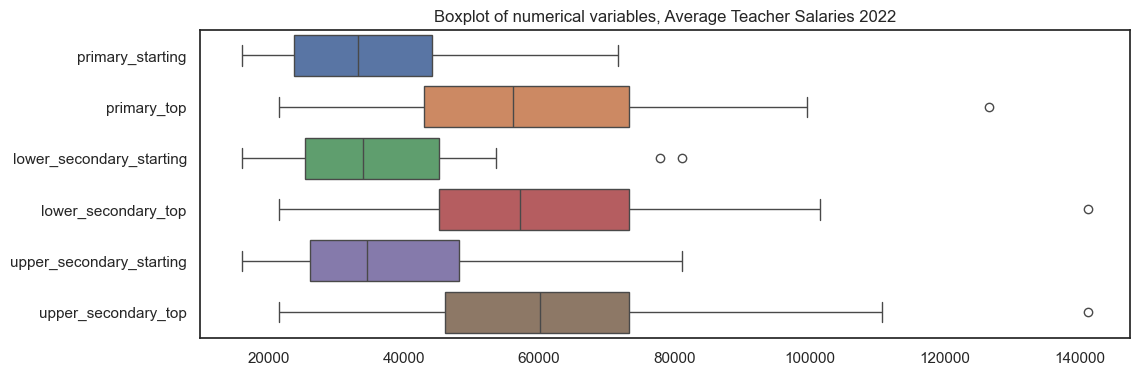

In [70]:
teacher_salary_numeric = ['primary_starting',
 'primary_top',
 'lower_secondary_starting',
 'lower_secondary_top',
 'upper_secondary_starting',
 'upper_secondary_top']
plt.figure(figsize=(12, 4))
boxplots = sns.boxplot(data=teacher_salaries[teacher_salary_numeric], orient='h')
plt.title('Boxplot of numerical variables, Average Teacher Salaries 2022')
plt.show()

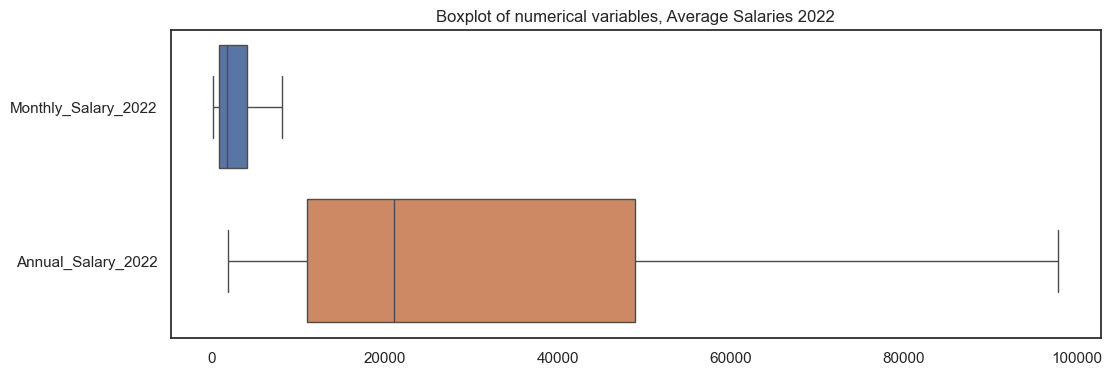

In [71]:
average_salary_numeric = ['Monthly_Salary_2022', 'Annual_Salary_2022']
plt.figure(figsize=(12, 4))
boxplots = sns.boxplot(data=average_salaries[average_salary_numeric], orient='h')
plt.title('Boxplot of numerical variables, Average Salaries 2022')
plt.show()

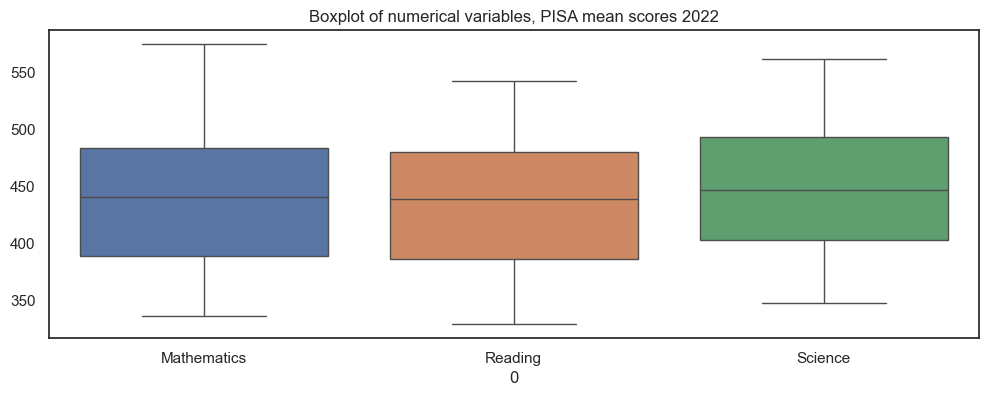

In [72]:
pisa_mean_numeric = ['Mathematics', 'Reading', 'Science']
plt.figure(figsize=(12, 4))
boxplots = sns.boxplot(data=pisa_mean_scores[pisa_mean_numeric])
plt.title('Boxplot of numerical variables, PISA mean scores 2022')
plt.show()

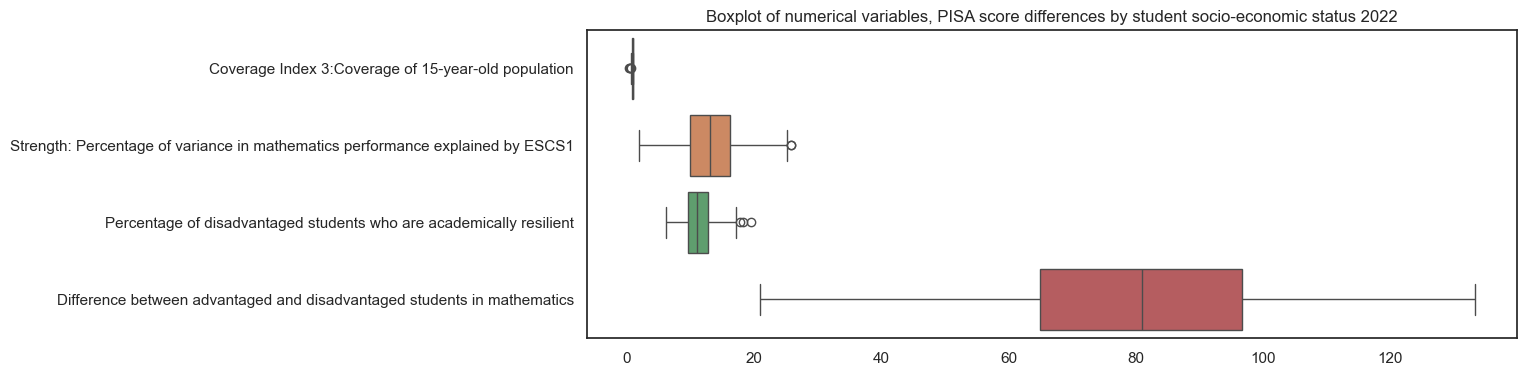

In [73]:
pisa_se_numeric = ['Coverage Index 3:Coverage of 15-year-old population',
 'Strength: Percentage of variance in mathematics performance explained by ESCS1',
 'Percentage of disadvantaged students who are academically resilient',
 'Difference between advantaged and disadvantaged students in mathematics']
plt.figure(figsize=(12, 4))
boxplots = sns.boxplot(data=pisa_socio_economic[pisa_se_numeric], orient='h')
plt.title('Boxplot of numerical variables, PISA score differences by student socio-economic status 2022')
plt.show()

Analyse the outliers

In [74]:
for i in teacher_salary_numeric:
    Q1 = teacher_salaries[i].quantile(0.25)
    Q3 = teacher_salaries[i].quantile(0.75)
    IQR = Q3 - Q1
    outliers = teacher_salaries[(teacher_salaries[i] < (Q1 - 1.5 * IQR)) | (teacher_salaries[i] > (Q3 + 1.5 * IQR))]
    print (i) 
    print('Mean value:', teacher_salaries[i].mean())
    print(outliers.loc[:, ['Country', i]])
    print('----------')

primary_starting
Mean value: 34733.882352941175
Empty DataFrame
Columns: [Country, primary_starting]
Index: []
----------
primary_top
Mean value: 59690.87096774193
      Country  primary_top
0  Luxembourg     126576.0
----------
lower_secondary_starting
Mean value: 35884.05882352941
      Country  lower_secondary_starting
0  Luxembourg                     81200
1     Germany                     77905
----------
lower_secondary_top
Mean value: 61841.74193548387
      Country  lower_secondary_top
0  Luxembourg             141144.0
----------
upper_secondary_starting
Mean value: 37080.44117647059
Empty DataFrame
Columns: [Country, upper_secondary_starting]
Index: []
----------
upper_secondary_top
Mean value: 63385.06451612903
      Country  upper_secondary_top
0  Luxembourg             141144.0
----------


In [75]:
for i in average_salary_numeric:
    Q1 = average_salaries[i].quantile(0.25)
    Q3 = average_salaries[i].quantile(0.75)
    IQR = Q3 - Q1
    outliers = average_salaries[(average_salaries[i] < (Q1 - 1.5 * IQR)) | (average_salaries[i] > (Q3 + 1.5 * IQR))]
    print (i) 
    print('Mean value:', average_salaries[i].mean())
    print(outliers.loc[:, ['Country', i]])
    print('----------')

Monthly_Salary_2022
Mean value: 2506.91
Empty DataFrame
Columns: [Country, Monthly_Salary_2022]
Index: []
----------
Annual_Salary_2022
Mean value: 30082.92
Empty DataFrame
Columns: [Country, Annual_Salary_2022]
Index: []
----------


In [76]:
for i in pisa_mean_numeric:
    Q1 = pisa_mean_scores[i].quantile(0.25)
    Q3 = pisa_mean_scores[i].quantile(0.75)
    IQR = Q3 - Q1
    outliers = pisa_mean_scores[(pisa_mean_scores[i] < (Q1 - 1.5 * IQR)) | (pisa_mean_scores[i] > (Q3 + 1.5 * IQR))]
    print (i) 
    print('Mean value:', pisa_mean_scores[i].mean())
    print(outliers.loc[:, ['Country', i]])
    print('----------')

Mathematics
Mean value: 437.62834256282355
Empty DataFrame
Columns: [Country, Mathematics]
Index: []
----------
Reading
Mean value: 435.037608537938
Empty DataFrame
Columns: [Country, Reading]
Index: []
----------
Science
Mean value: 446.89344746541127
Empty DataFrame
Columns: [Country, Science]
Index: []
----------


In [77]:
for i in pisa_se_numeric:
    Q1 = pisa_socio_economic[i].quantile(0.25)
    Q3 = pisa_socio_economic[i].quantile(0.75)
    IQR = Q3 - Q1
    outliers = pisa_socio_economic[(pisa_socio_economic[i] < (Q1 - 1.5 * IQR)) | (pisa_socio_economic[i] > (Q3 + 1.5 * IQR))]
    print (i) 
    print('Mean value:', pisa_socio_economic[i].mean())
    print(outliers.loc[:, ['Country', i]])
    print('----------')

Coverage Index 3:Coverage of 15-year-old population
Mean value: 0.8445177540183068
                         Country  \
0                       Cambodia   
25                     Guatemala   
64                        Panama   
80  Ukrainian regions (18 of 27)   

    Coverage Index 3:Coverage of 15-year-old population  
0                                            0.362739    
25                                           0.477004    
64                                           0.576539    
80                                           0.415615    
----------
Strength: Percentage of variance in mathematics performance explained by ESCS1
Mean value: 13.046058796789248
     Country  \
70  Slovakia   
71   Romania   

    Strength: Percentage of variance in mathematics performance explained by ESCS1  
70                                          25.715808                               
71                                          25.837530                               
----------
Percentage

Bar charts

In [78]:
teacher_salaries.head()

,flagCode,Country,primary_starting,primary_top,lower_secondary_starting,lower_secondary_top,upper_secondary_starting,upper_secondary_top
0,LU,Luxembourg,71647,126576.0,81200,141144.0,81200,141144.0
1,DE,Germany,70419,91713.0,77905,101510.0,81141,110694.0
2,DK,Denmark,53364,61473.0,53598,61968.0,50444,65555.0
3,AT,Austria,49646,86526.0,49646,92041.0,49646,102120.0
4,NL,Netherlands,48805,99715.0,48662,99717.0,48662,99717.0


In [86]:
from PIL import Image
import io
import requests

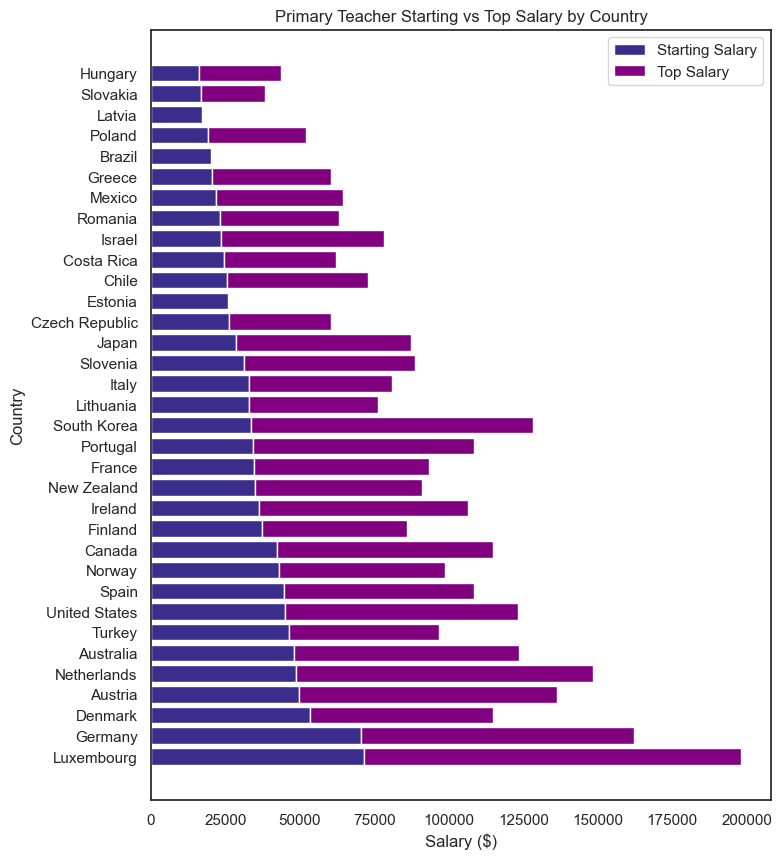

In [100]:
import requests
import io
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Plot
plt.figure(figsize=(8,10))
plt.barh(teacher_salaries['Country'], teacher_salaries['primary_starting'], label='Starting Salary', color='#3a2d8b')
plt.barh(teacher_salaries['Country'], teacher_salaries['primary_top'], left=teacher_salaries['primary_starting'], label='Top Salary', color='purple')

# Labels & Title
plt.xlabel('Salary ($)')
plt.ylabel('Country')
plt.title('Primary Teacher Starting vs Top Salary by Country')
plt.legend()

# Show the plot
plt.show()

No country name found for Luxembourg
No country name found for Germany
No country name found for Denmark
No country name found for Austria
No country name found for Netherlands
No country name found for Australia
No country name found for Turkey
No country name found for United States
No country name found for Spain
No country name found for Norway
No country name found for Canada
No country name found for Finland
No country name found for Ireland
No country name found for New Zealand
No country name found for France
No country name found for Portugal
No country name found for South Korea
No country name found for Lithuania
No country name found for Italy
No country name found for Slovenia
No country name found for Japan
No country name found for Czech Republic
No country name found for Estonia
No country name found for Chile
No country name found for Costa Rica
No country name found for Israel
No country name found for Romania
No country name found for Mexico
No country name found for

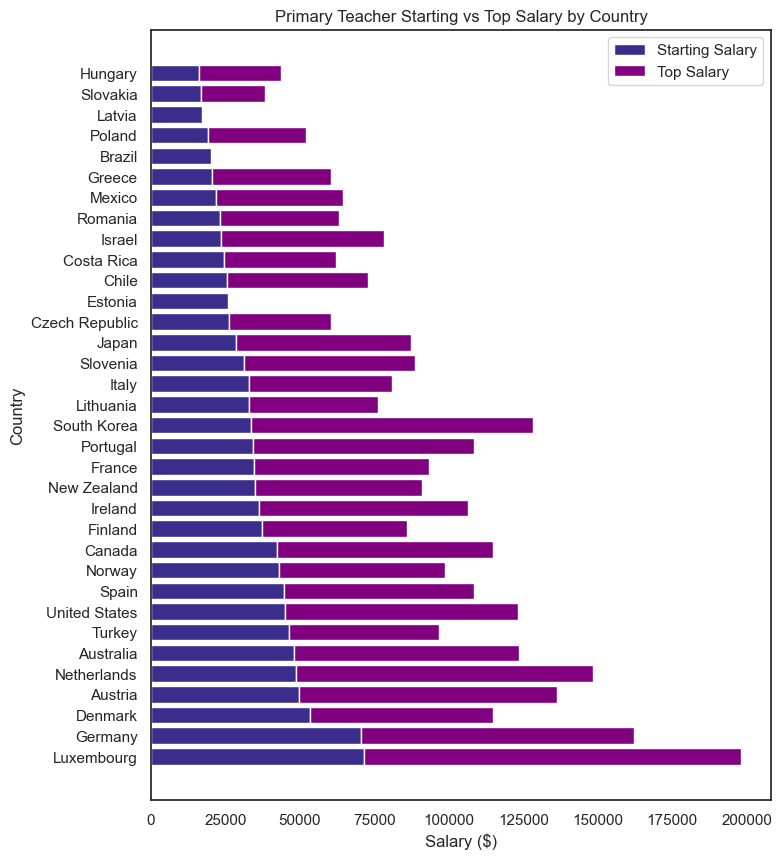

In [102]:
import requests
import io
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Assuming 'teacher_salaries' DataFrame and 'country_flags' dictionary are already defined
# country_flags dictionary should map country names to flag URLs

# Plot
plt.figure(figsize=(8, 10))
plt.barh(teacher_salaries['Country'], teacher_salaries['primary_starting'], label='Starting Salary', color='#3a2d8b')
plt.barh(teacher_salaries['Country'], teacher_salaries['primary_top'], left=teacher_salaries['primary_starting'], label='Top Salary', color='purple')

# Labels & Title
plt.xlabel('Salary ($)')
plt.ylabel('Country')
plt.title('Primary Teacher Starting vs Top Salary by Country')
plt.legend()

# Adding flags next to country names
for i, country in enumerate(teacher_salaries['Country']):
    # Using the country name to find the URL of the flag
    country_name = country_data.get(country)
    if country_name:
        flag_url = country_flags.get(country_name)
        
        if flag_url:
            try:
                response = requests.get(flag_url)
                img = Image.open(io.BytesIO(response.content))
                
                # Resize image to fit next to the label
                img = img.resize((2, 2))  # Adjust size as needed

                # Create OffsetImage with the resized flag image
                imagebox = OffsetImage(img, zoom=1, clip_path=None)

                # Create AnnotationBbox to place the image at the right position
                ab = AnnotationBbox(imagebox, (teacher_salaries['primary_starting'][i] + teacher_salaries['primary_top'][i] + 2000, i),
                                    frameon=False, xycoords='data', boxcoords="offset points", boxalignment="center", pad=0.5)

                # Add the flag image to the plot
                plt.gca().add_artist(ab)
            except requests.exceptions.RequestException as e:
                print(f"Error fetching flag for {country_name}: {e}")
        else:
            print(f"No flag URL found for {country_name}")
    else:
        print(f"No country name found for {country}")

# Show the plot
plt.show()

In [101]:
print(get_flag_file('Spain'))

/Users/beejalparekh/Desktop/Bootcamp/_DA_course/_DA-project_/flags/es.svg
